<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 30px; ">Tutoriel d'exemple de résolution d'un problème de machine learning </h1>
</div>

## Problématique étudiée

La problématique étudiée est le cas avec le dataset hand-written digits. L'objectif de ce cas est de reconnaître des chiffres annotés à la main à partir d'une base de données disponible.

<div align="center">Il s'agit donc d'un cas de **machine learning supervisé**, et plus spécifiquement d'un cas de **classification**.</div> 

Ce notebook va vous guider à travers ce cas concret de classification, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : les SVM classifier(Support Vector Machines). Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

## Code

 ### <div align="center">Importation des différentes librairies.</div>

In [3]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

 ### <div align="center">Importation des datasets.</div>

La première étape est d'importer le dataset et de voir de quoi il est constitué. Ici on importe le dataset hand-written digits.

In [4]:
# Import the hand-written digits dataset
digits = datasets.load_digits()

In [5]:
# Dataset description
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

On voit grâce à la description détaillée qu'il s'agit d'un dataset qui cherche à faire de la reconnaissance optique de chiffres écrits à la main (grâce au titre), puis qu'il contient 1797 exemples de chiffres, avec 64 *attributes* par chiffre. Il se trouve que l'on comprend ensuite que ces *attributes* sont directement le nombre de pixels que contient chacune des 1797 images disponibles, chacune représentant un nombre entre 0 et 9 (c'est la partie *attribute information* qui nous renseigne là-dessus). 

Nous sommes donc en possession de 1797 images de 8x8 pixels qui représentent des chiffres de 0 à 9.

Pour s'en assurer nous représentons quelques-uns de ces chiffres :

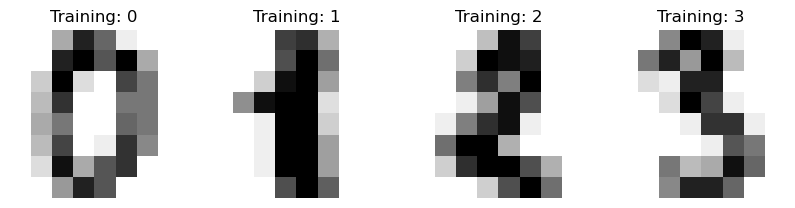

In [6]:
# Plot some data to show what they look like
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

 ### <div align="center">Phase d'apprentisage du modèle.</div>

La première étape lors de l'utilisation d'une méthode d'apprentissage supervisée, c'est l'apprentissage. Dans cette étape, nous allons construire notre modèle en lui donnant un certain nombre d'exemples depuis notre base de données. La règle de base lors de cette étape est de séparer la base de données en deux : une partie pour l'apprentissage et une partie pour le test. Ceci afin de ne pas montrer lors de la phase de test des exemples de chiffres qui auraient servis lors de la phase d'apprentissage, car alors le test serait biaisé.

Mais pour pouvoir apprendre un modèle, ce dernier a besoin de *features*, c'est-à-dire des nombres en entrée, servant à décrire nos images dans un *langage* compris par la machine. En traitement d'images, la solution la plus simple pour produire ces *features* consiste à *vectoriser* l'image, c'est-à-dire passer l'image 8x8 sous forme d'un vecteur de taille 64, dont chaque ligne représente la valeur d'un pixel en niveau de gris. C'est ce que nous faisons juste en-dessous :

In [7]:
# Vectorize the images to have 
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Print data shape to understand with what we work
print("Taille avant vectorisation : {}\nTaille après vectorisation : {}".format(digits.images.shape, data.shape))

Taille avant vectorisation : (1797, 8, 8)
Taille après vectorisation : (1797, 64)


Puis, nous divisons notre jeu de données d'entrée en deux sous-ensembles, afin de constituer nos jeux de données d'apprentissage (constitué ici de 70 % des données de départ), et de test (30 % des données de départ).

In [8]:
# Split data with 70% to train and 30% to test
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

Puis nous choisissons le modèle à mettre en place, nous l'apprenons, et nous le testons dans la foulée :

In [9]:
# Create a random forest classifier
classifier = SVC(kernel = 'linear', random_state = 0)
# Learn the digits on the train subset
classifier.fit(X_train, y_train)
# Predict the value of the digit on the test subset
predicted = classifier.predict(X_test)

Enfin, nous regardons quelques résultats de prédiction, pour voir de manière qualitative si le modèle semble bien fonctionner.

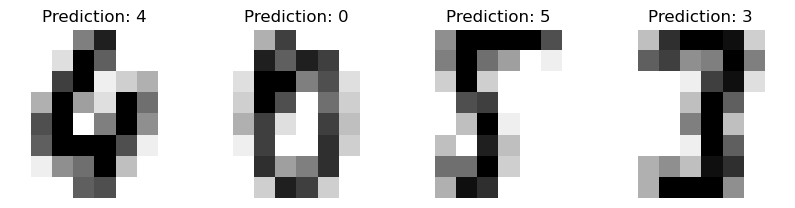

In [11]:
# Plot some predictions
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

 ### <div align="center">Vérification des résultas pour valider le modèle.</div>

Une étape essentielle après l'apprentissage et le test d'un modèle de machine learning est l'analyse de ses performances afin de valider s'il fonctionne ou non. Pour ce faire, nous utilisons différentes métriques, dont nous vous invitons à aller chercher les définitions en ligne : la précision, le recall, et le f1-score.
Ces métriques doivent toutes tendre vers 1 lorsque le modèle fonctionne bien.

In [13]:
# Print the results on the test set for each class from 0 to 9
print(
    f"Classification report for classifier {classifier}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(kernel='linear', random_state=0):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.92      0.91      0.91        53
           2       1.00      0.96      0.98        53
           3       0.90      0.85      0.87        53
           4       0.98      0.93      0.95        57
           5       0.95      0.98      0.96        56
           6       0.96      0.98      0.97        54
           7       0.96      0.96      0.96        54
           8       0.82      0.87      0.84        52
           9       0.88      0.91      0.89        55

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540




On constate que les résultats sont globalement corrects, mais que la classe 8 par exemple souffre de quelques difficultés à être correctement classifiée.
Il est intéressant de voir que le nombre d'images testées par classe est à peu près égal, ce qui assure une bonne représentativité de chaque classe dans les résultats (on parle de problème équilibré). Il est important de s'assurer de cet équilibre dès la phase d'apprentissage pour être certain de ne pas biaiser l'apprentissage de certaines classes (une classe sous-représentée pourrait être très peu prédite en pratique). 
On retrouve bien ici que 540 images en test représentent eniron 30 % de 1764 images du jeu de données complet, ce qui est cohérent.

Pour analyser plus finement les résultats, on représente enuite la matrice de confusion, qui montre pour chaque classe le nombre de bonnes et mauvaises classification, et ce de manière croisée pour savoir dans quelles classes ont été prédites les erreurs de classification :

Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 1 35  1  2  2  1  0  5  0  6]
 [ 1  0 41  9  0  0  0  2  0  0]
 [ 0  1  6 39  0  2  0  4  1  0]
 [ 3  0  0  0 46  0  4  4  0  0]
 [ 0  0  0  1  2 44  5  1  0  3]
 [ 0  0  1  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0 12  3  6  1  2  0  9 16  3]
 [ 2  0  0  2  0  1  0  6  0 44]]


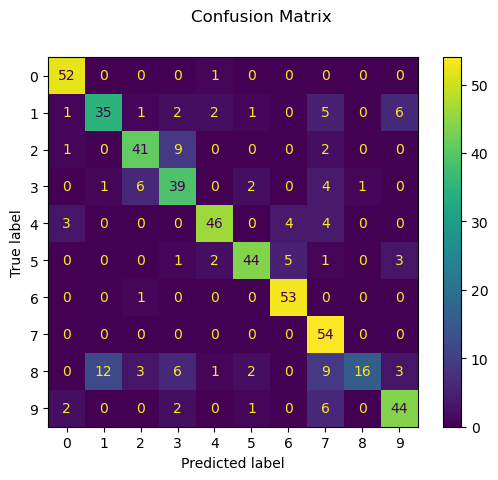

In [ ]:
# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

On remarque alors que les erreurs observés au global pour la classe 8 se concentrent dans la classe 1 et 7, et une analyse plus approfondie peut alors être menée pour déterminer pourquoi ces erreurs se font spécifiquement sur ces classes-là.

#### Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !